Leer los datos

In [51]:
import pandas as pd     
df = pd.read_csv('data.csv')

In [52]:
df.head()

,Nombre,Handle de Codeforces,Rating de Codeforces,Ranking IOI 2019,Ranking IOI 2020,Ranking IOI 2021,Ranking IOI 2022,Ranking IOI 2023,Ranking IOI 2024,Pais,Highest Rated Problem
0,Kangyang Zhou,orzdevinwang,3529.0,NaN,NaN,NaN,NaN,NaN,100.00,China,3500.0
1,Adam Gąsienica-Samek,adam_gs,2876.0,NaN,NaN,NaN,NaN,85.71,99.72,Poland,3100.0
2,Brian Xue,hyforces,2503.0,NaN,NaN,NaN,NaN,NaN,99.43,United States,3000.0
3,Daniel Weber,CommandMaster,2276.0,NaN,NaN,NaN,92.55,93.43,99.15,Israel,2400.0
4,Agastya Goel,gustergoose27,2448.0,NaN,NaN,NaN,NaN,98.29,99.15,United States,2500.0


In [53]:
# eliminar columna Handle de Codeforces
df.drop('Handle de Codeforces', axis=1, inplace=True)

In [54]:
print(len(df.loc[(df['Rating de Codeforces'].isna()) | (df['Rating de Codeforces'] == '')]) * 100 / len(df))

df_no_missing = df.loc[(df['Rating de Codeforces'].notna()) & (df['Rating de Codeforces'] != '')]


24.37673130193906


In [112]:
from sklearn.model_selection import train_test_split

# Suponiendo que df_no_missing ya está cargado y limpio
# Selecciona las columnas relevantes
df_reduced = df_no_missing[['Rating de Codeforces', 'Ranking IOI 2024','Highest Rated Problem']]

# Aplica el One-Hot Encoding a la columna 'Pais'
# df_reduced = pd.get_dummies(df_reduced, columns=['Pais'], drop_first=True)

# Define las características (X) y la variable objetivo (y)
X = df_reduced.drop('Ranking IOI 2024', axis=1)
y = df_reduced['Ranking IOI 2024']

# Divide los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Muestra las primeras filas de X_train y X_test después de aplicar One-Hot Encoding
print("X_train:")
print(len(X_train))
print("\nX_test:")
print(len(X_test))


X_train:
204

X_test:
69


Ahora a crear el modelo

Mean Squared Error: 185.6143153969462


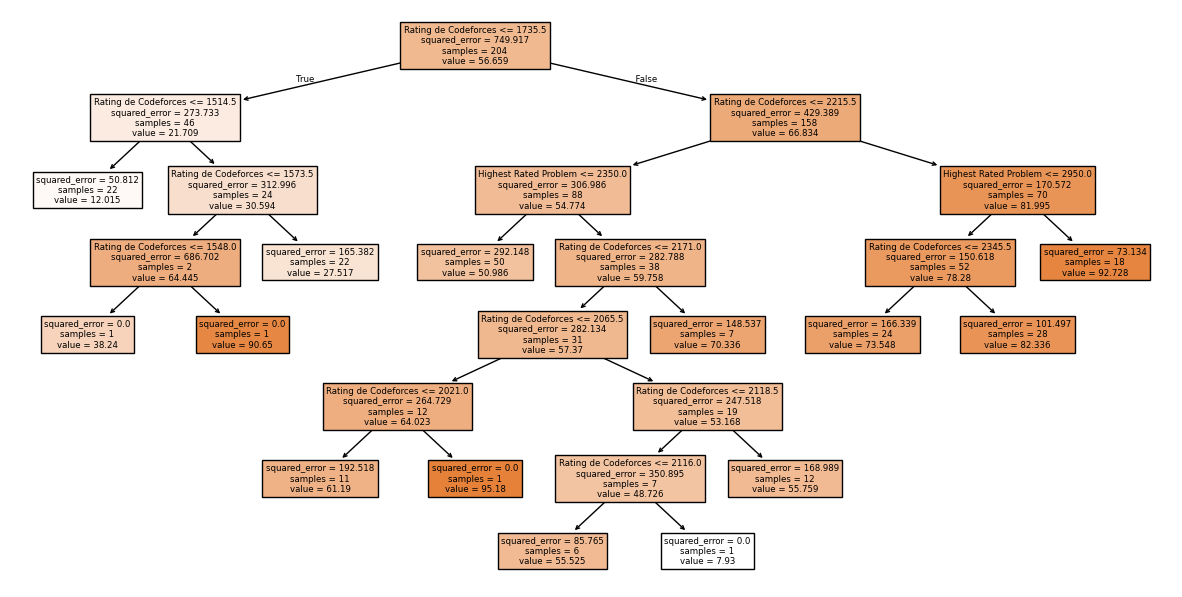

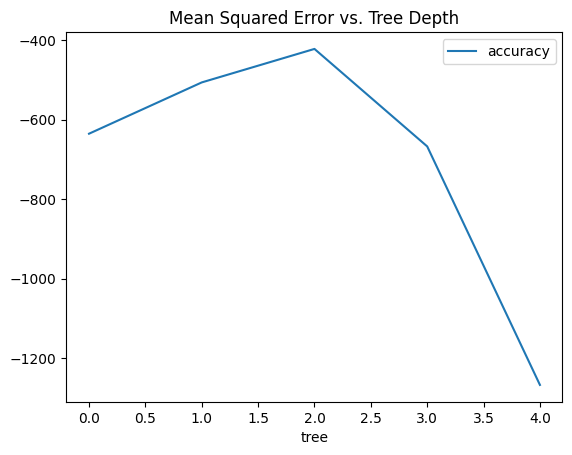

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

# Initialize the regression tree model
regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=4.5)

# Fit the model
regressor.fit(X_train, y_train)

plt.figure(figsize=(15, 7.5))

plot_tree(regressor, filled=True, feature_names=X.columns)

# Make predictions
y_pred = regressor.predict(X_test)

# do aplhas
ccp_alphas = regressor.cost_complexity_pruning_path(X_train, y_train).ccp_alphas


# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')

df = pd.DataFrame(data={'tree' : range(5), 'accuracy' : scores})
df.plot(x='tree', y='accuracy', kind='line', title='Mean Squared Error vs. Tree Depth')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Testing Data Set

Mean Squared Error (MSE): 185.6143153969462
R-squared (R²): 0.7750289581618661


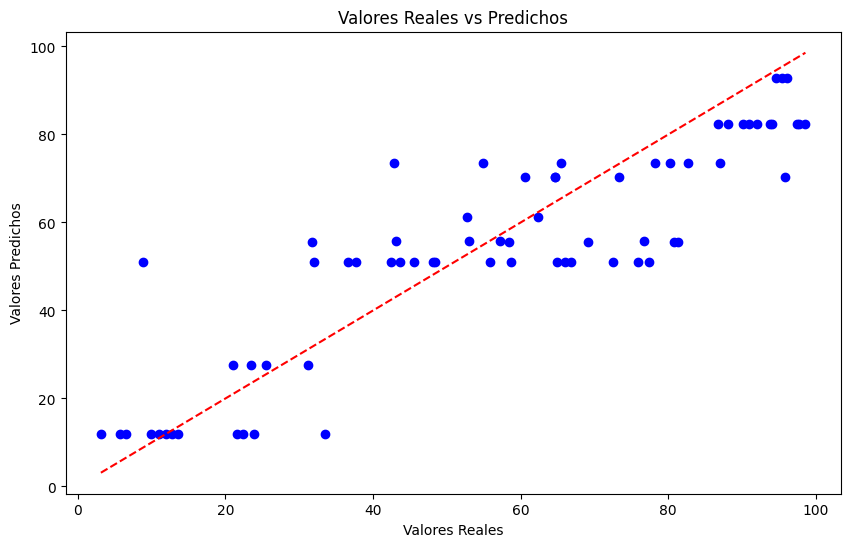

In [134]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el modelo usando el Error Cuadrático Medio (MSE) y el R-squared (R²)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Opcional: Graficar los valores reales vs. los predichos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.show()


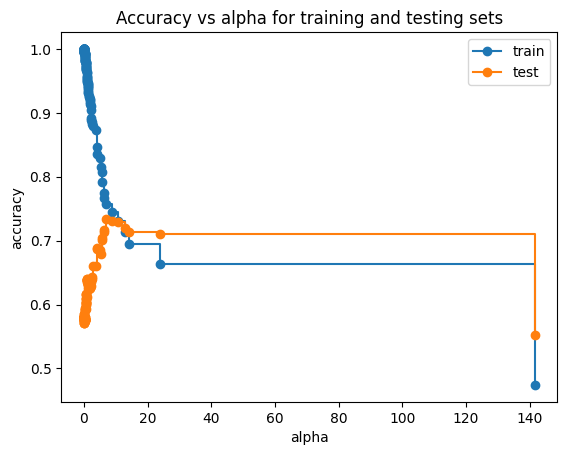

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

path  = regressor.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas  = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)
    
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha") 
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

